##Name- Gaurav Kadve

AI/ML morning slot

Assignment 15 sep

Perform Data preprocessing on Titanic dataset

1.Data Collection.
   Please download the dataset from
   https://www.kaggle.com/datasets/yasserh/titanic-dataset



2.Data Preprocessing

    o	Import the Libraries.
    o	Importing the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o	Perform Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test

###1.Import libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



Mounted at /content/drive


###2.Import Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


###3.Checking for Null Values

In [9]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Fill null ages as mean age

In [11]:
df['Age'] = df['Age'].fillna(np.mean(df['Age']))

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Replacing 2 null values in embarked with mean

In [13]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


Dropping column not in use and having maximum number of null values i.e. Cabin column


In [16]:
df_cleaned = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [17]:
df_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


###4.Data Visualization

In [18]:
df_cleaned.corr()

<ipython-input-18-32b4bd7cf4f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<ipython-input-19-5c497d1505c7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned.corr())


<Axes: >

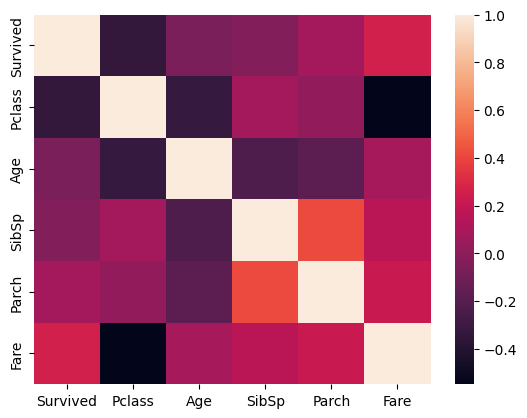

In [19]:
sns.heatmap(df_cleaned.corr())

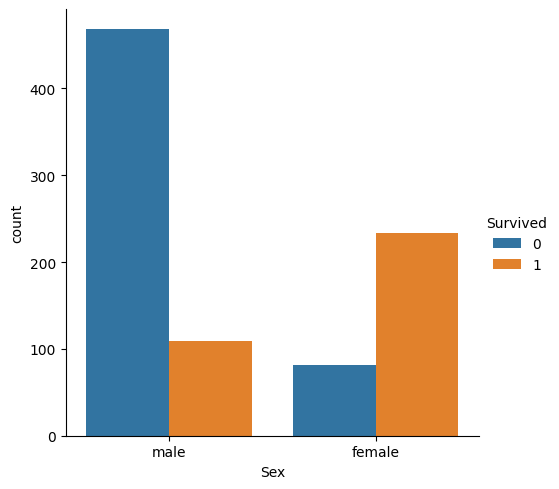

In [20]:
sns.catplot(x ="Sex", hue ="Survived",kind ="count", data = df_cleaned)

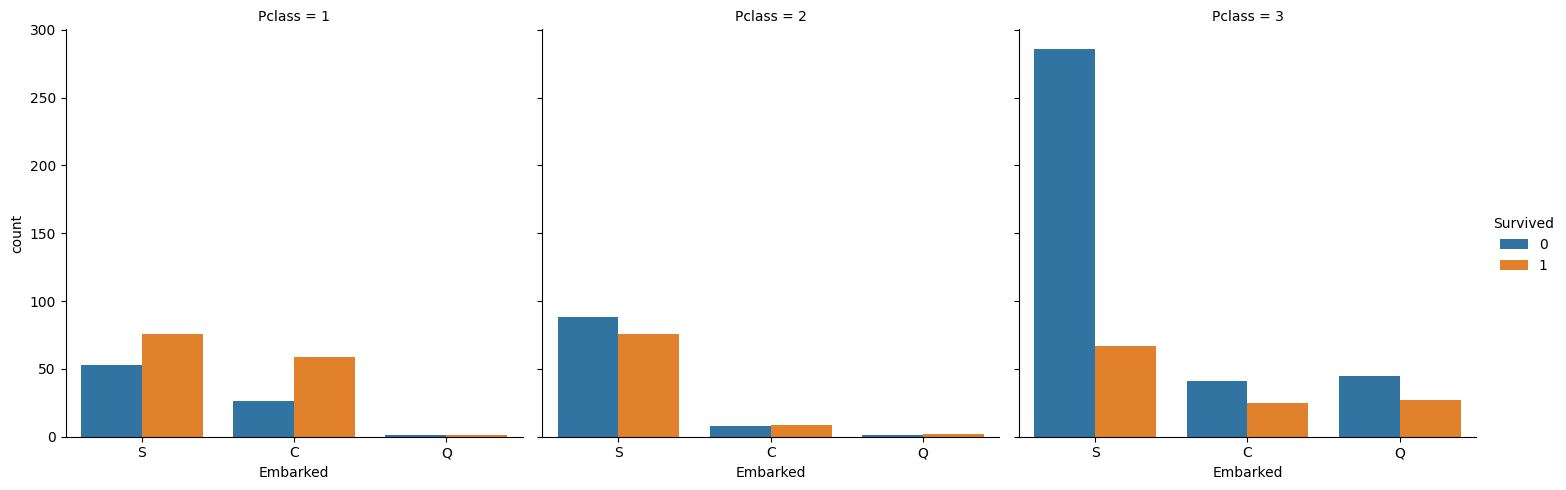

In [21]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = df_cleaned)


<Axes: xlabel='Sex', ylabel='Age'>

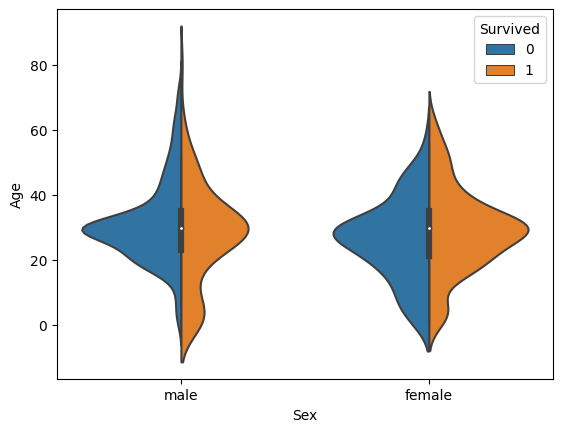

In [22]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",data = df_cleaned, split = True)

###5.Outliers detection

In [23]:
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: >

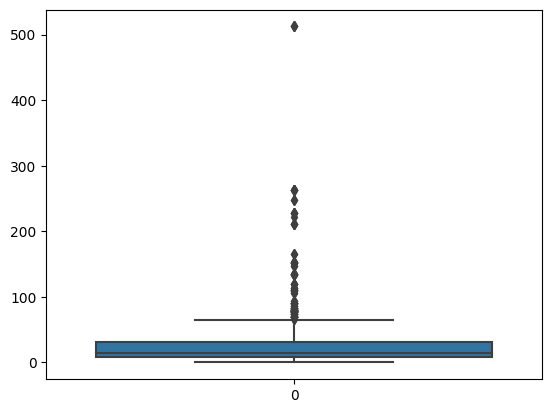

In [26]:
sns.boxplot(df_cleaned["Fare"])

In [27]:
df_cleaned["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Using IQR technique because the Fare variable is not normally distributed.

In [28]:
IQR=df_cleaned.Fare.quantile(0.75)-df_cleaned.Fare.quantile(0.25)

lower_bridge=df_cleaned['Fare'].quantile(0.25)-(IQR*1.5)

upper_bridge=df_cleaned['Fare'].quantile(0.75)+(IQR*1.5)

print(lower_bridge)

print(upper_bridge)

-26.724
65.6344


In [29]:
lower_bridge=df_cleaned['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df_cleaned['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge)

print(upper_bridge)

-61.358399999999996
100.2688


In [30]:
df_cleaned.loc[df_cleaned['Fare']>=66,'Fare']=66

<Axes: >

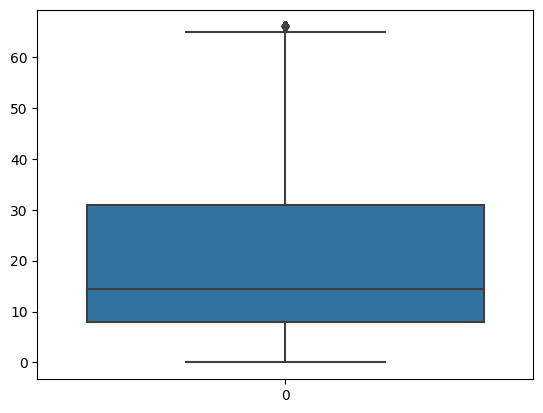

In [31]:
sns.boxplot(df_cleaned["Fare"])

###6.Split dependent and independent data

In [32]:
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,66.000,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S


In [33]:
x= df_cleaned.iloc[:,1:]
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.250,S
1,1,female,38.0,1,0,66.000,C
2,3,female,26.0,0,0,7.925,S
3,1,female,35.0,1,0,53.100,S
4,3,male,35.0,0,0,8.050,S


In [34]:
y=df_cleaned.iloc[:,:1]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


###7.Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
x["Sex"]=le.fit_transform(x["Sex"])

In [44]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.250,2
1,1,0,38.0,1,0,66.000,0
2,3,0,26.0,0,0,7.925,2
3,1,0,35.0,1,0,53.100,2
4,3,1,35.0,0,0,8.050,2


In [45]:
print(le.classes_)

[0 1]


In [47]:
x["Embarked"]=le.fit_transform(x["Embarked"])

In [48]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.250,2
1,1,0,38.0,1,0,66.000,0
2,3,0,26.0,0,0,7.925,2
3,1,0,35.0,1,0,53.100,2
4,3,1,35.0,0,0,8.050,2


In [41]:
print(le.classes_)

['C' 'Q' 'S']


###8.Feature Scaling

In [49]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

In [53]:
x_scaled=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [54]:
x_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.819003,0.585954
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,2.037519,-1.942303
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.786183,0.585954
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,1.410300,0.585954
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.780106,0.585954


###9.Train test Split

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size =0.2,random_state =0)

In [56]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 7) (179, 7) (712, 1) (179, 1)


In [57]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
140,0.827377,-1.355574,0.000000,-0.474545,2.008933,-0.430234,-1.942303
439,-0.369365,0.737695,0.100109,-0.474545,-0.473674,-0.660983,0.585954
817,-0.369365,0.737695,0.100109,0.432793,0.767630,0.627695,-1.942303
378,0.827377,0.737695,-0.746389,-0.474545,-0.473674,-0.976416,-1.942303
491,0.827377,0.737695,-0.669435,-0.474545,-0.473674,-0.819003,0.585954
...,...,...,...,...,...,...,...
835,-1.566107,-1.355574,0.715743,0.432793,0.767630,2.037519,-1.942303
192,0.827377,-1.355574,-0.823344,0.432793,-0.473674,-0.789626,0.585954
629,0.827377,0.737695,0.000000,-0.474545,-0.473674,-0.795504,-0.678175
559,0.827377,-1.355574,0.484880,0.432793,-0.473674,-0.325493,0.585954


In [58]:
y_train

,Survived
140,0
439,0
817,0
378,0
491,0
...,...
835,1
192,1
629,0
559,1


In [59]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
495,0.827377,0.737695,0.000000,-0.474545,-0.473674,-0.468524,-1.942303
648,0.827377,0.737695,0.000000,-0.474545,-0.473674,-0.804417,0.585954
278,0.827377,0.737695,-1.746796,3.154809,0.767630,0.244596,-0.678175
31,-1.566107,-1.355574,0.000000,0.432793,-0.473674,2.037519,-1.942303
255,0.827377,-1.355574,-0.053800,-0.474545,2.008933,-0.430234,-1.942303
...,...,...,...,...,...,...,...
780,0.827377,-1.355574,-1.285070,-0.474545,-0.473674,-0.820014,-1.942303
837,0.827377,0.737695,0.000000,-0.474545,-0.473674,-0.780106,0.585954
215,-1.566107,-1.355574,0.100109,0.432793,-0.473674,2.037519,-1.942303
833,0.827377,0.737695,-0.515526,-0.474545,-0.473674,-0.789626,0.585954


In [60]:
y_test

,Survived
495,0
648,0
278,0
31,1
255,1
...,...
780,1
837,0
215,1
833,0
